<a href="https://colab.research.google.com/github/ShindeParth31/Playstore_Data_Analysis/blob/main/Playstoreana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import plotly.express as px
from textblob import TextBlob
from google.colab import files

sns.set(style="whitegrid")

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load your dataset (auto-detect filename)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Dataset Loaded Successfully!")
df.head()


Saving playstore_dataset_with_review_text.csv to playstore_dataset_with_review_text.csv
Dataset Loaded Successfully!


,App,Category,Rating,Reviews,Review,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,WhatsApp Messenger,Communication,4.3,120000000,Very useful for messaging and calling.,30M,"5,000,000,000+",Free,0,Everyone,Communication,"January 15, 2024",2.23.5,5.0 and up
1,Instagram,Social,4.5,90000000,Amazing platform for sharing photos.,28M,"1,000,000,000+",Free,0,Teen,Social,"January 10, 2024",300.1,6.0 and up
2,Facebook,Social,4.1,140000000,Good app but sometimes slow.,45M,"5,000,000,000+",Free,0,Teen,Social,"January 12, 2024",400.2,5.0 and up
3,Snapchat,Social,4.2,45000000,Fun filters and easy to use.,25M,"1,000,000,000+",Free,0,Teen,Social,"January 8, 2024",12.10,5.0 and up
4,Spotify,Music & Audio,4.4,22000000,Best music streaming app.,35M,"1,000,000,000+",Free,0,Teen,Music,"January 1, 2024",8.9,5.0 and up


In [ ]:
# STEP 3: Data Cleaning & Preparation (Handles Missing Columns)

print("\n📌 Starting Data Cleaning...\n")

# Remove duplicate rows
df = df.drop_duplicates()

# Remove auto-generated index columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# ---- Safe Cleaning Functions ----
def clean_numeric(col):
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        print(f"⚠️ Missing Column: {col}")

def clean_text(col):
    if col in df.columns:
        df[col] = df[col].astype(str)
    else:
        print(f"⚠️ Missing Column: {col}")

# ---- Clean Specific Columns ----
clean_numeric("Rating")
clean_numeric("Reviews")

# Clean Price
if "Price" in df.columns:
    df["Price"] = df["Price"].astype(str).str.replace("$", "", regex=False)
    df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
else:
    print("⚠️ Missing 'Price' column.")

# Clean Installs
if "Installs" in df.columns:
    df["Installs"] = (
        df["Installs"]
        .astype(str)
        .str.replace("+", "", regex=False)
        .str.replace(",", "", regex=False)
    )
    df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")
else:
    print("⚠️ Missing 'Installs' column.")

# Clean Size
if "Size" in df.columns:
    if df["Size"].notna().sum() == 0:
        print("⚠️ Size column empty — filling as NaN.")
        df["Size"] = np.nan
    else:
        df["Size"] = df["Size"].astype(str)
        df["Size"] = df["Size"].replace("Varies with device", np.nan)

        def convert_size(x):
            try:
                if "M" in x:
                    return float(x.replace("M", "")) * 1_000_000
                elif "k" in x:
                    return float(x.replace("k", "")) * 1_000
                return float(x)
            except:
                return np.nan

        df["Size"] = df["Size"].apply(convert_size)
else:
    print("⚠️ Missing 'Size' column.")

# Convert Date Column
if "Last Updated" in df.columns:
    df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")

# Fill Missing Values
if "Category" in df.columns:
    df["Category"] = df["Category"].fillna("Unknown")

df = df.fillna(0)

print("✅ Data Cleaning Completed Successfully!\n")
df.info()



📌 Starting Data Cleaning...

✅ Data Cleaning Completed Successfully!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             20 non-null     object        
 1   Category        20 non-null     object        
 2   Rating          20 non-null     float64       
 3   Reviews         20 non-null     int64         
 4   Review          20 non-null     object        
 5   Size            20 non-null     float64       
 6   Installs        20 non-null     int64         
 7   Type            20 non-null     object        
 8   Price           20 non-null     int64         
 9   Content Rating  20 non-null     object        
 10  Genres          20 non-null     object        
 11  Last Updated    20 non-null     datetime64[ns]
 12  Current Ver     20 non-null     object        
 13  Android Ver     20 non-null     object   


📊 CATEGORY EXPLORATION



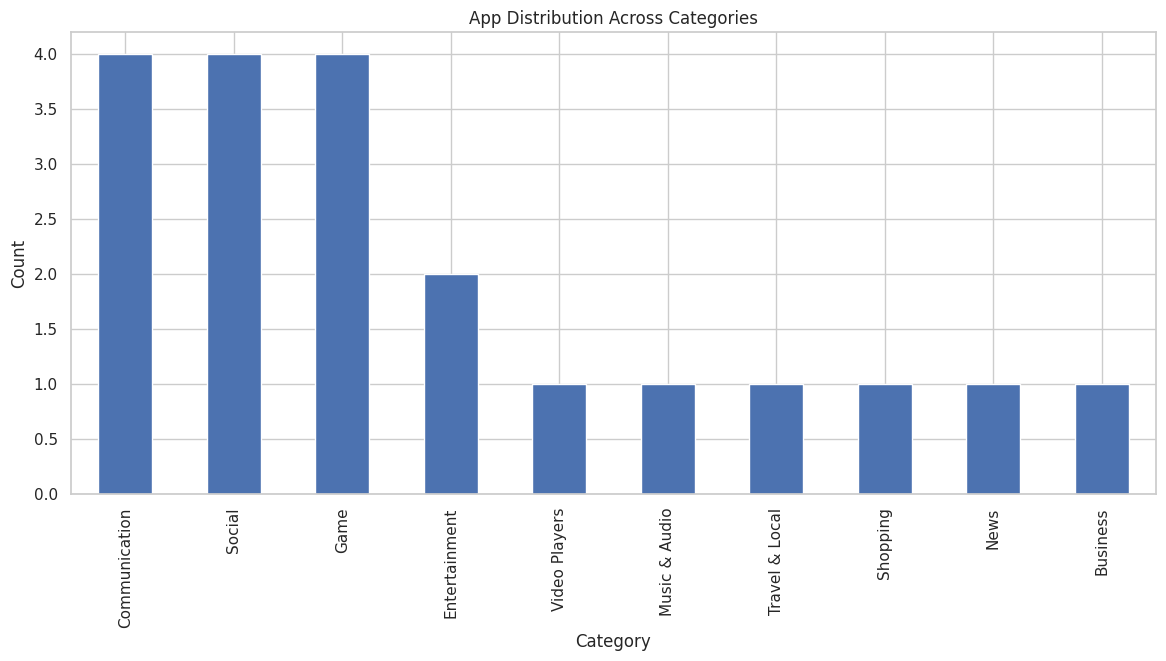

In [ ]:
# STEP 4: Category Exploration

print("\n📊 CATEGORY EXPLORATION\n")

if "Category" in df.columns:
    plt.figure(figsize=(14,6))
    df["Category"].value_counts().plot(kind="bar")
    plt.title("App Distribution Across Categories")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.show()

    fig = px.bar(df["Category"].value_counts(), title="Category Count (Interactive)")
    fig.show()
else:
    print("⚠️ No 'Category' column found.")



📈 METRICS ANALYSIS



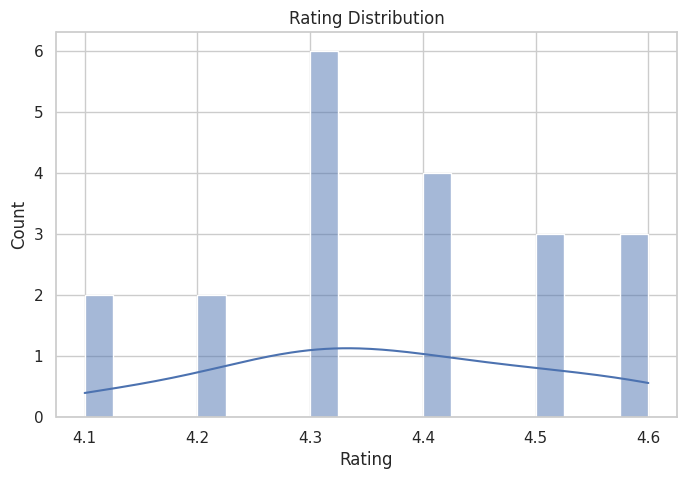

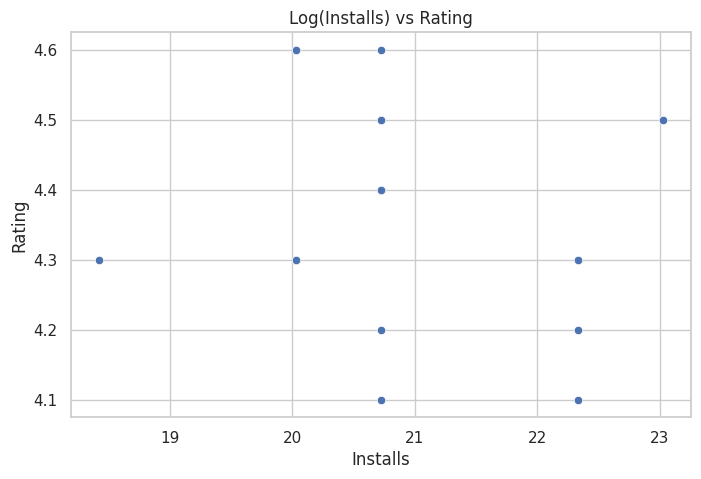

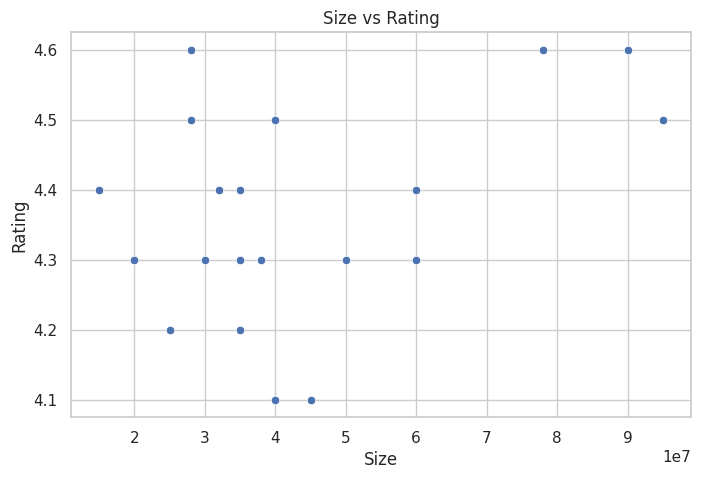

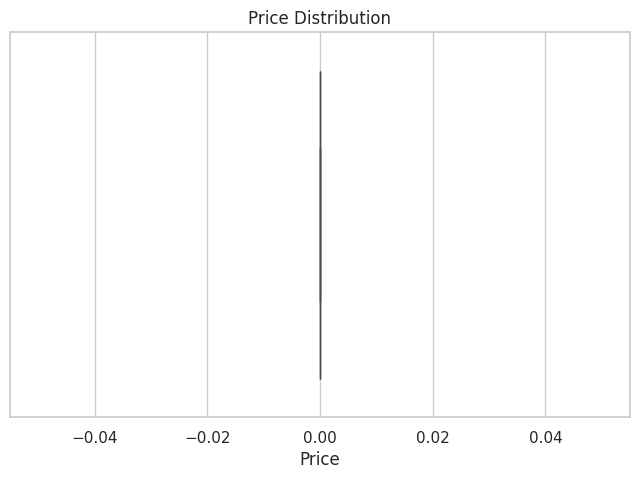

In [ ]:
# STEP 5: Metrics Analysis

print("\n📈 METRICS ANALYSIS\n")

# Rating Distribution
if "Rating" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["Rating"], kde=True, bins=20)
    plt.title("Rating Distribution")
    plt.show()

# Installs vs Rating
if {"Installs", "Rating"}.issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=np.log1p(df["Installs"]), y=df["Rating"])
    plt.title("Log(Installs) vs Rating")
    plt.show()

# Size vs Rating
if {"Size", "Rating"}.issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df["Size"], y=df["Rating"])
    plt.title("Size vs Rating")
    plt.show()

# Price Distribution
if "Price" in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df["Price"])
    plt.title("Price Distribution")
    plt.show()



💬 SENTIMENT ANALYSIS



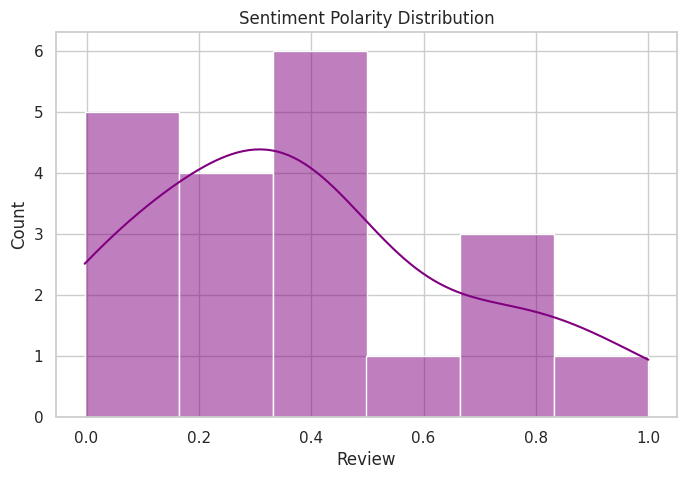

Average Sentiment Score: 0.3768333333333334


In [ ]:
# STEP 6: Sentiment Analysis

print("\n💬 SENTIMENT ANALYSIS\n")

# Detect possible review column
review_cols = ["Review", "Reviews", "Translated_Review"]

sentiment_col = None
for col in review_cols:
    if col in df.columns and df[col].dtype == object:
        sentiment_col = col
        break

if sentiment_col:
    sample = df[sentiment_col].astype(str).dropna().sample(min(500, df.shape[0]))

    def sentiment(text):
        return TextBlob(text).sentiment.polarity

    sentiment_scores = sample.apply(sentiment)

    plt.figure(figsize=(8,5))
    sns.histplot(sentiment_scores, kde=True, color="purple")
    plt.title("Sentiment Polarity Distribution")
    plt.show()

    print("Average Sentiment Score:", sentiment_scores.mean())
else:
    print("⚠️ No review text column available.")


In [ ]:
# STEP 7: Interactive Visualizations (Plotly)

print("\n🧩 INTERACTIVE VISUALIZATIONS\n")

# Top installed apps
if {"App", "Installs"}.issubset(df.columns):
    top20 = df.nlargest(20, "Installs")
    fig = px.bar(top20, x="App", y="Installs", title="Top 20 Apps by Installs")
    fig.show()

# Bubble chart
if {"Rating", "Installs", "Category"}.issubset(df.columns):
    fig = px.scatter(
        df,
        x="Rating",
        y="Installs",
        size="Installs",
        color="Category",
        title="Rating vs Installs Bubble Chart"
    )
    fig.show()



🧩 INTERACTIVE VISUALIZATIONS



In [ ]:
# STEP 8: Project Summary

print("\n📌 PROJECT SUMMARY\n")

print(f"Total Apps: {len(df)}")

if "Rating" in df.columns:
    print("Average Rating:", round(df["Rating"].mean(), 2))

if "Installs" in df.columns:
    print("Average Installs:", int(df["Installs"].mean()))

print("\n🎉 Project Completed Successfully!")



📌 PROJECT SUMMARY

Total Apps: 20
Average Rating: 4.36
Average Installs: 2080000000

🎉 Project Completed Successfully!
